In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [4]:
pd.read_csv('../Project Reference Materials/fifa_world_cup.csv')

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [7]:
df = pd.read_csv('../Project Reference Materials/fifa_world_cup.csv')  

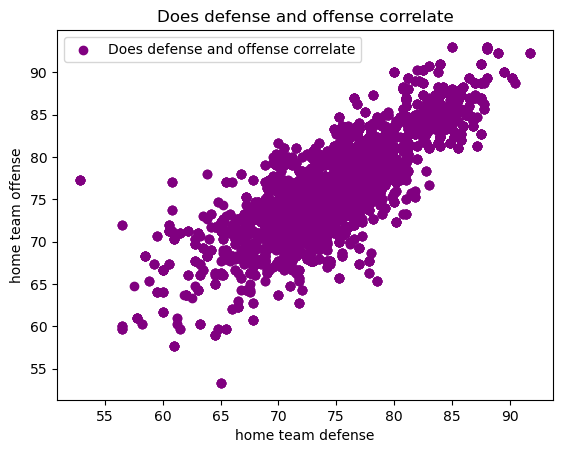

In [9]:
# scatter plot
plt.scatter(df['home_team_mean_defense_score'], df['home_team_mean_offense_score'], marker = 'o', color = 'purple', label = 'Does defense and offense correlate')
plt.title('Does defense and offense correlate')
plt.xlabel('home team defense')
plt.ylabel('home team offense')
plt.legend()

In [11]:
# Self question, is there a correlation between stronger defenses having also stronger offenses?

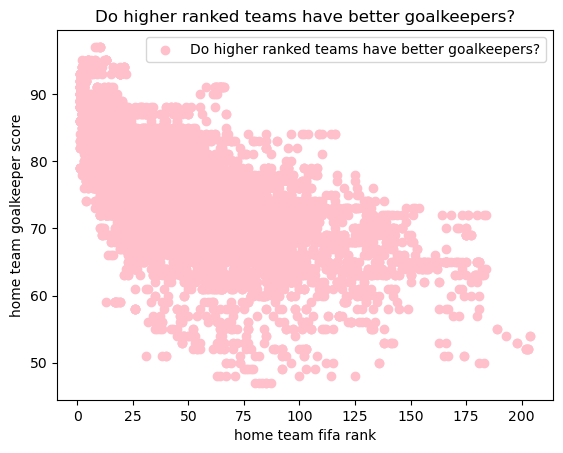

In [13]:
# scatter plot
plt.scatter(df['home_team_fifa_rank'], df['home_team_goalkeeper_score'], marker = 'o', color = 'pink', label = 'Do higher ranked teams have better goalkeepers?')
plt.title('Do higher ranked teams have better goalkeepers?')
plt.xlabel('home team fifa rank')
plt.ylabel('home team goalkeeper score')
plt.legend()

In [ ]:
# Self question, Do higher ranked teams have better goalkeepers?

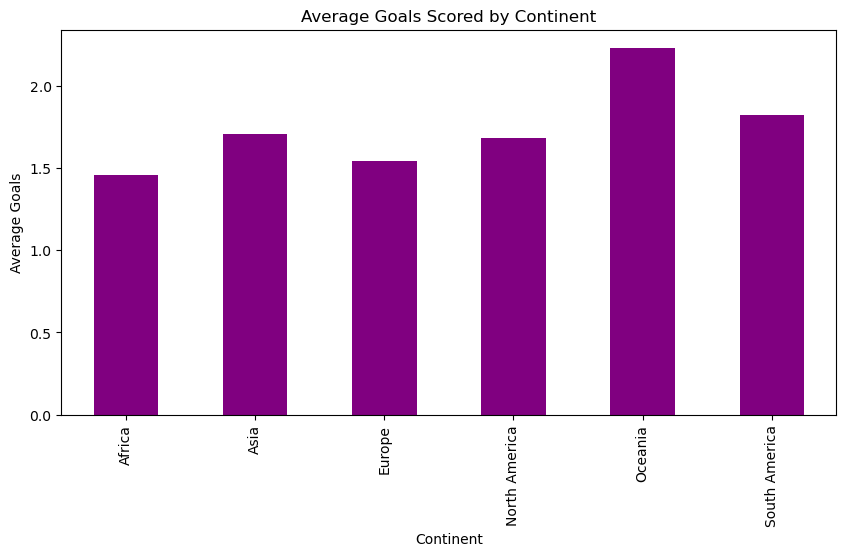

In [16]:
df.groupby('home_team_continent')['home_team_score'].mean().plot(kind='bar', color='purple', figsize=(10,5))
plt.xlabel('Continent')
plt.ylabel('Average Goals')
plt.title('Average Goals Scored by Continent')
plt.show()

In [18]:
# Self question, Which continent has the highest-scoring teams? Oceania**

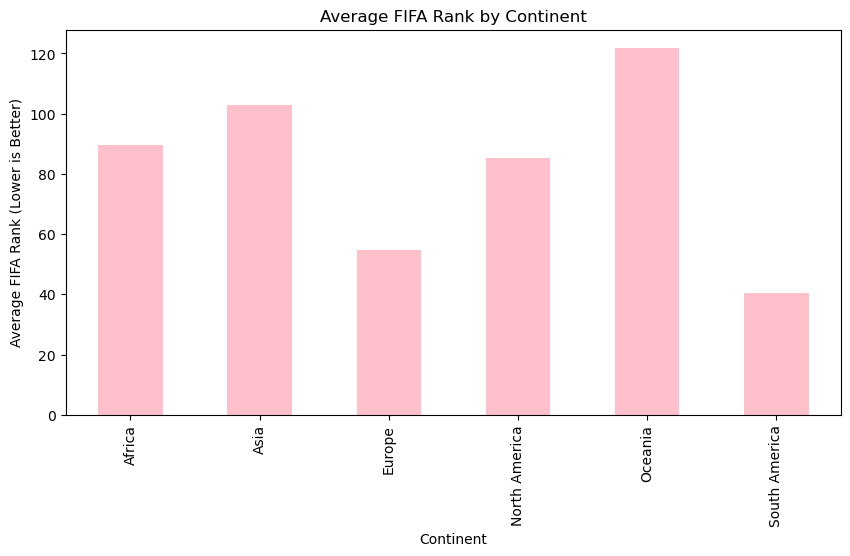

In [20]:
df.groupby('home_team_continent')['home_team_fifa_rank'].mean().plot(kind='bar', color='pink', figsize=(10,5))
plt.xlabel('Continent')
plt.ylabel('Average FIFA Rank (Lower is Better)')
plt.title('Average FIFA Rank by Continent')
plt.show()

In [22]:
# Question 1 on instructions, can also be connected with the question above as well. 

In [25]:
df = df[df['home_team_result'].notna()]

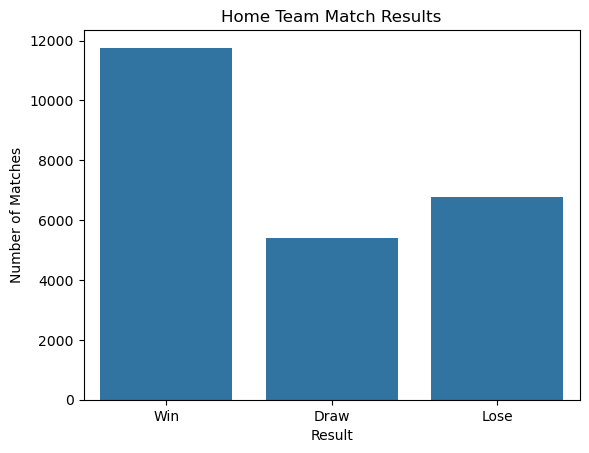

In [27]:
sns.countplot(data=df, x='home_team_result', order=['Win', 'Draw', 'Lose'])
plt.title('Home Team Match Results')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.show()

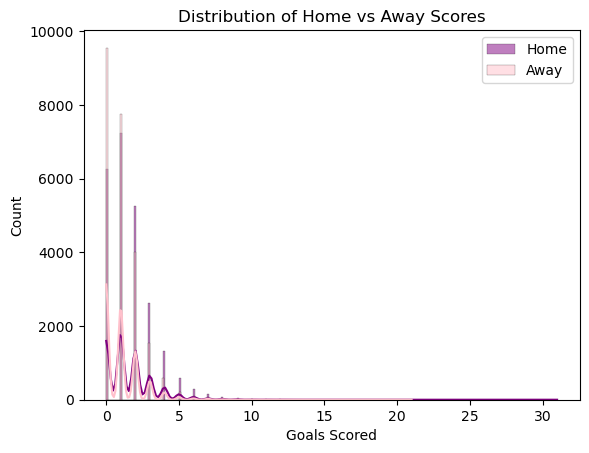

In [31]:
sns.histplot(df['home_team_score'], color='purple', label='Home', kde=True)
sns.histplot(df['away_team_score'], color='pink', label='Away', kde=True)
plt.legend()
plt.title('Distribution of Home vs Away Scores')
plt.xlabel('Goals Scored')
plt.show()

In [ ]:
# Question #3 given, I feel personally it is harder to tell as while the actual matches are wins the distribution of the away scores do seem to be higher for away games.

In [33]:
df['date'] = pd.to_datetime(df['date'])

In [35]:
df = df.sort_values('date')

In [37]:
df['is_home_win'] = df['home_team_result'] == 'Win'

In [39]:
home = df[['date', 'home_team', 'home_team_result']].copy()
home.columns = ['date', 'team', 'result']
home['win'] = home['result'] == 'Win'

In [41]:
away = df[['date', 'away_team', 'home_team_result']].copy()
away.columns = ['date', 'team', 'result']
away['win'] = away['result'] == 'Lose'

In [43]:
all_matches = pd.concat([home, away])
all_matches = all_matches.sort_values(['team', 'date'])

In [47]:
def longest_streak(series):
    max_streak = streak = 0
    for val in series:
        if val:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak


streaks = all_matches.groupby('team')['win'].apply(longest_streak).sort_values(ascending=False)

print(streaks.head(10))


team
Spain                   25
Italy                   15
France                  14
Brazil                  14
Australia               13
Belgium                 12
Morocco                 12
United Arab Emirates    11
Sweden                  11
Russia                  11
Name: win, dtype: int64


C:\Users\Jennavieve\AppData\Local\Temp\ipykernel_35688\3610164241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_streaks.values, y=top_streaks.index, palette='viridis')


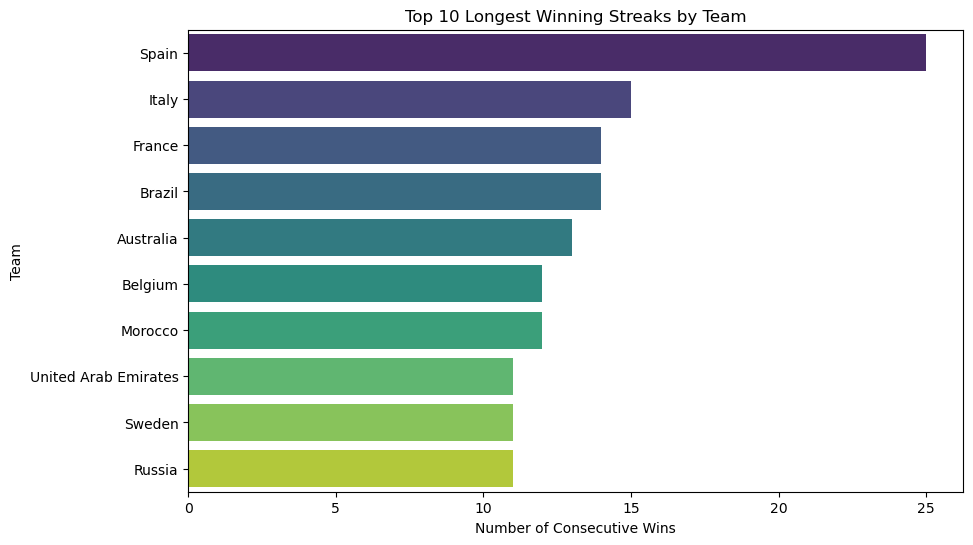

In [51]:
top_streaks = streaks.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_streaks.values, y=top_streaks.index, palette='viridis')
plt.title('Top 10 Longest Winning Streaks by Team')
plt.xlabel('Number of Consecutive Wins')
plt.ylabel('Team')
plt.show()



In [ ]:
# Question 5, 